In [1]:
#data_loader
import csv
import os
import sqlite3
def load_to_sql(filepath: str):
  conn = sqlite3.connect('medical_data.db')
  cursor = conn.cursor()
  # Создание таблицы Medical
  cursor.execute('''
    CREATE TABLE IF NOT EXISTS Medical (
      id INTEGER PRIMARY KEY AUTOINCREMENT,
      Age INTEGER, Gender INTEGER, Heart INTEGER,
      "Systolic blood pressure" INTEGER,
      "Diastolic blood pressure" INTEGER,
      "Blood sugar" REAL, "CK-MB" REAL,
       Troponin REAL, Result TEXT
       )
    ''')
  with open(filepath, 'r') as f:
    reader = csv.DictReader(f)
    # Список ключей (заголовков) в том порядке, в котором они идут в CSV
    keys = [
        'Age', 'Gender', 'Heart rate',
        'Systolic blood pressure', 'Diastolic blood pressure',
        'Blood sugar', 'CK-MB', 'Troponin', 'Result'
     ]
    # Каждый словарь переводим в кортеж значений в нужном порядке
    # (row[key] гарантирует, что мы берем верные данные, даже если в CSV другой порядок)
    data_to_insert = (tuple(row[k] for k in keys) for row in reader)
    # Формирование запроса sql
    sql = 'INSERT INTO Medical (Age, Gender, Heart, "Systolic blood pressure", "Diastolic blood pressure", "Blood sugar", "CK-MB", Troponin, Result) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)'
    # Попытка выполнить запрос
    try:
        cursor.executemany(sql, data_to_insert)
        conn.commit()
        print("Готово! Загрузка данных в базу завершена.")
    except Exception as e:
        print(f"Ошибка: {e}")

  conn.close()

In [ ]:
#data_query
import sqlite3
#Выполнение запроса к базе sql
def execute_query(dbase, query:str):
  connection = sqlite3.connect(dbase)
  cursor = connection.cursor()
  result = None
  try:
        cursor.execute(query)
        if cursor.description:
           headers = [col[0] for col in cursor.description]
        else:
           print("Запрос не вернул столбцов")
        result = cursor.fetchall()
  except Exception as e:
        print(f"Ошибка: {e}")
  connection.close()
  return result, headers



In [ ]:
#data_processing
import pandas as pd
import sqlite3
from sklearn.preprocessing import LabelEncoder

#Получение дата-фрейма из запроса sql
def prepare_date(dbase, query):
  connection = sqlite3.connect(dbase)
  df = pd.read_sql(query, connection)
  connection.close()
  return df

def info(df):
  #Информация о датасете
    return df.info()

def count_missing(df):
    # Количество пропущенных значений в каждом столбце.
    return df.isnull().sum().sort_values(ascending=False)

def missing_report(df):
    #Отчёт о пропущенных значениях
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    report = pd.DataFrame({
        'Пропущено': missing_count,
        'Процент': missing_percent
    })
    report = report[report['Пропущено'] > 0].sort_values('Пропущено', ascending=False)
    return report

def InfoClass(df):
    #Суммарные данные о классах
    return df.Result.value_counts()
def EncodingClass(df):
    le = LabelEncoder()
    df.Result = le.fit_transform(df.Result)
    return df.Result.value_counts()



In [ ]:
#data_vizualization
import matplotlib.pyplot as plt
import seaborn as sns
def Hist(df):
  df.hist(bins=10, figsize=(13, 12))
  plt.show()
def Pairplt(df, x1, y1):
  sns.scatterplot(df, x=x1, y=y1, palette = 'Set2', hue = 'Result')




In [2]:
#main
import loader_sql as ld
import data_query as dq
import processing as ps
import vizualization as dv
ld.load_to_sql('/content/Medicaldataset.csv')


Готово! Загрузка данных в базу завершена.


In [3]:
# Выполнение запроса на выборку всех данных из базы

res, head = dq.execute_query('medical_data.db', 'SELECT * from Medical LIMIT 10')
for kol in head:
  print(kol,sep=' | ', end =' | ')
print()
for pacient in res:
  print('  |   '. join(map(str,pacient)))

id | Age | Gender | Heart | Systolic blood pressure | Diastolic blood pressure | Blood sugar | CK-MB | Troponin | Result | 
1  |   63  |   1  |   66  |   160  |   83  |   160.0  |   1.8  |   0.012  |   negative
2  |   20  |   1  |   94  |   98  |   46  |   296.0  |   6.75  |   1.06  |   positive
3  |   56  |   1  |   64  |   160  |   77  |   270.0  |   1.99  |   0.003  |   negative
4  |   66  |   1  |   70  |   120  |   55  |   270.0  |   13.87  |   0.122  |   positive
5  |   54  |   1  |   64  |   112  |   65  |   300.0  |   1.08  |   0.003  |   negative
6  |   52  |   0  |   61  |   112  |   58  |   87.0  |   1.83  |   0.004  |   negative
7  |   38  |   0  |   40  |   179  |   68  |   102.0  |   0.71  |   0.003  |   negative
8  |   61  |   1  |   60  |   214  |   82  |   87.0  |   300.0  |   2.37  |   positive
9  |   49  |   0  |   60  |   154  |   81  |   135.0  |   2.35  |   0.004  |   negative
10  |   65  |   1  |   61  |   160  |   95  |   100.0  |   2.84  |   0.011  |   negative

In [4]:
# Выборка пациентов старше 50 лет
res, head = dq.execute_query('medical_data.db', 'SELECT Age, Gender, Heart, "Systolic blood pressure", "Diastolic blood pressure", Result  FROM Medical WHERE Age > 50 LIMIT 10')
for kol in head:
  print(kol,sep=' | ', end =' | ')
print()
for pacient in res:
  print('  |   '. join(map(str,pacient)))


Age | Gender | Heart | Systolic blood pressure | Diastolic blood pressure | Result | 
63  |   1  |   66  |   160  |   83  |   negative
56  |   1  |   64  |   160  |   77  |   negative
66  |   1  |   70  |   120  |   55  |   positive
54  |   1  |   64  |   112  |   65  |   negative
52  |   0  |   61  |   112  |   58  |   negative
61  |   1  |   60  |   214  |   82  |   positive
65  |   1  |   61  |   160  |   95  |   negative
63  |   0  |   60  |   150  |   83  |   negative
64  |   1  |   60  |   199  |   99  |   positive
54  |   0  |   94  |   122  |   67  |   negative


In [5]:
#Выборка самых возрастных пациентов
res, head = dq.execute_query('medical_data.db', 'SELECT Age, Gender, Heart, "Systolic blood pressure", "Diastolic blood pressure", Result  FROM Medical WHERE Age = (SELECT MAX(Age) FROM Medical)')
for kol in head:
  print(kol,sep=' | ', end =' | ')
print()
for pacient in res:
  print('  |   '. join(map(str,pacient)))


Age | Gender | Heart | Systolic blood pressure | Diastolic blood pressure | Result | 
103  |   0  |   86  |   146  |   92  |   positive
103  |   0  |   56  |   171  |   56  |   positive


In [6]:
#Средний возраст пациентов
res, head = dq.execute_query('medical_data.db', 'SELECT AVG(Age) FROM Medical')
print('Средний возраст пациентов ', str(*res[0]))

Средний возраст пациентов  56.19332827899924


In [7]:
# Подготовка данных
df = ps.prepare_date('medical_data.db', 'SELECT * from Medical')
ps.info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1319 non-null   int64  
 1   Age                       1319 non-null   int64  
 2   Gender                    1319 non-null   int64  
 3   Heart                     1319 non-null   int64  
 4   Systolic blood pressure   1319 non-null   int64  
 5   Diastolic blood pressure  1319 non-null   int64  
 6   Blood sugar               1319 non-null   float64
 7   CK-MB                     1319 non-null   float64
 8   Troponin                  1319 non-null   float64
 9   Result                    1319 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 103.2+ KB


In [8]:
#Суммарные данные
ps.InfoClass(df)

,count
Result,
positive,810
negative,509


In [ ]:
#Преобразование значений классов
ps.EncodingClass(df)

,count
Result,
1,2430
0,1527


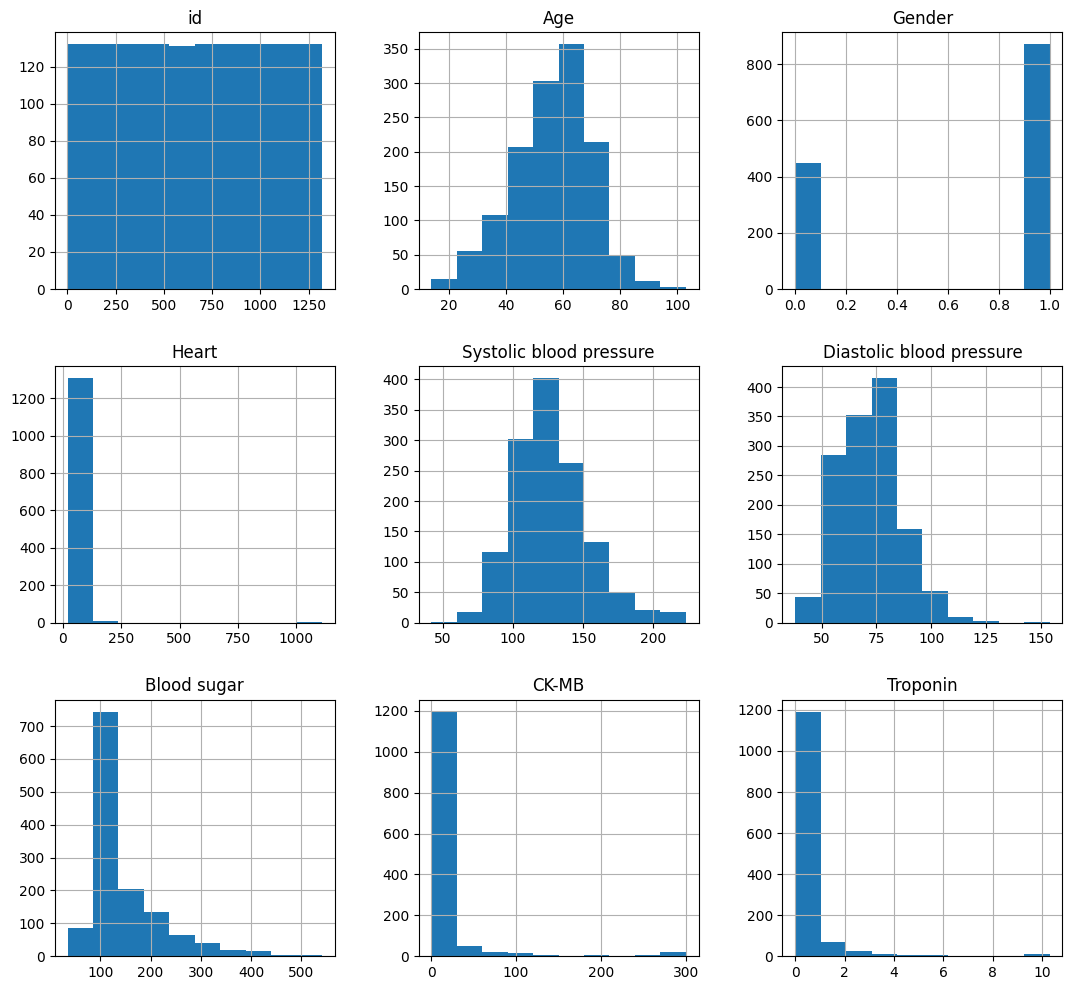

In [9]:
# Визуализация гистограммы
dv.Hist(df)

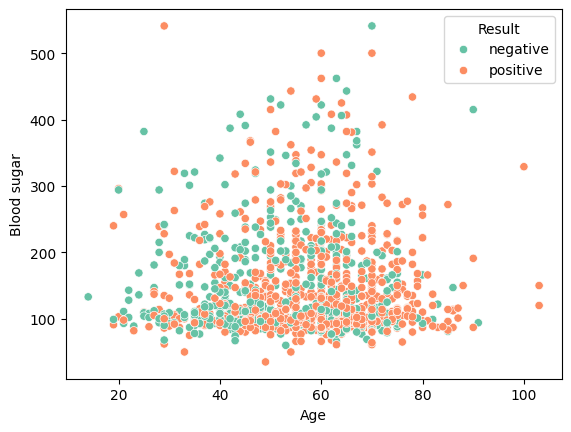

In [10]:
#Возраст и уровень сахара в крови
dv.Pairplt(df, "Age", "Blood sugar")

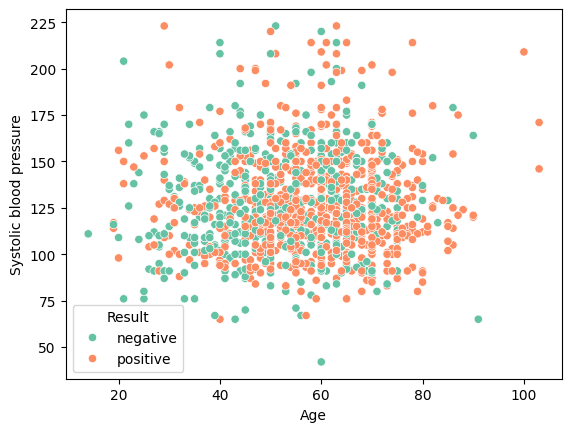

In [11]:
#возраст и систолическое давление
dv.Pairplt(df, "Age", "Systolic blood pressure")

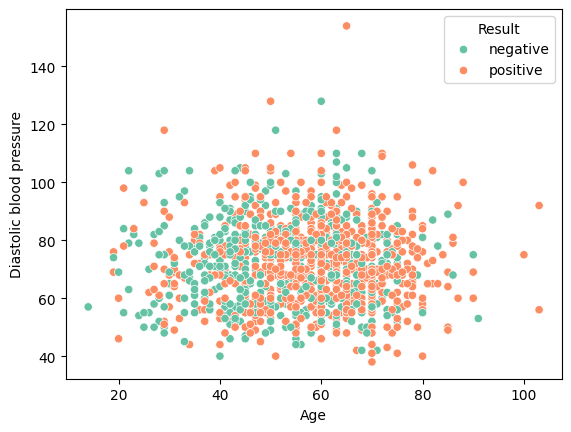

In [12]:
#Возраста и диастолическое давление
dv.Pairplt(df, "Age", "Diastolic blood pressure")

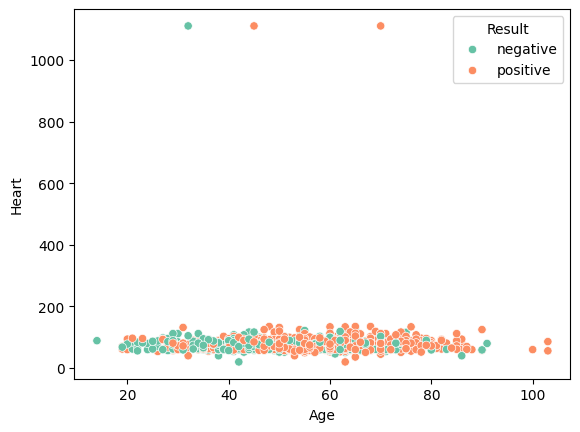

In [13]:
# Возраст и пульс пациента
dv.Pairplt(df, "Age", "Heart")

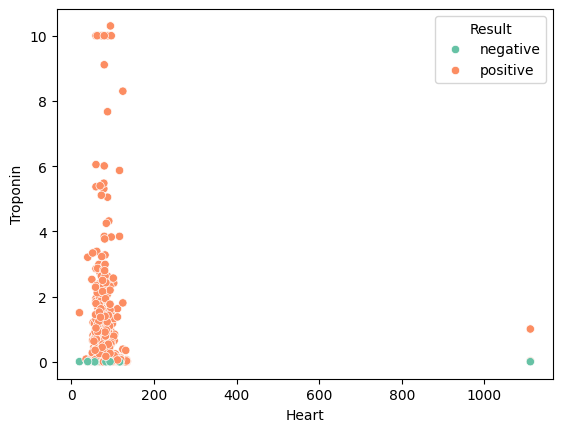

In [14]:
#Взаимосвязь пульса и тропонина
dv.Pairplt(df, "Heart", "Troponin")

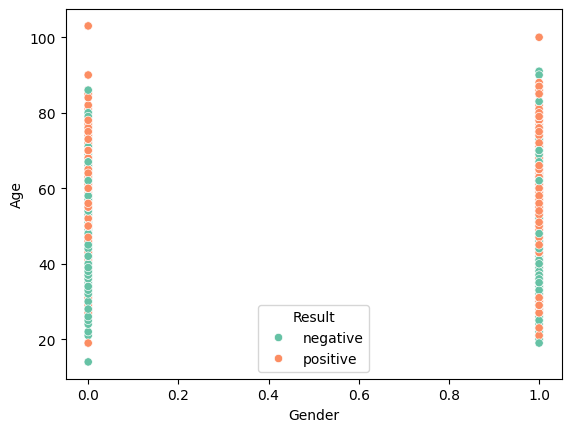

In [15]:
#Взаимосвязь пол - возраст
dv.Pairplt(df, "Gender", "Age")

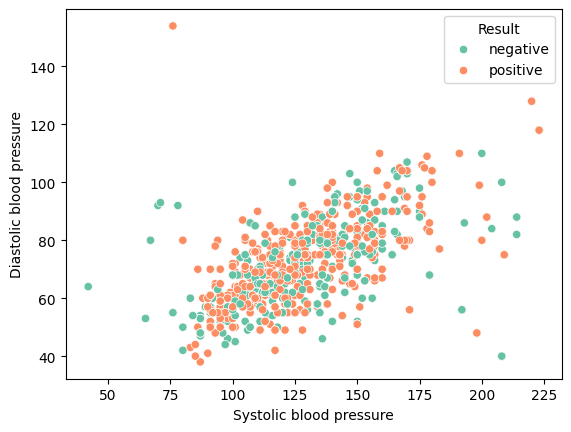

In [16]:
# Систолическое и диастолическое давления
dv.Pairplt(df, "Systolic blood pressure", "Diastolic blood pressure")

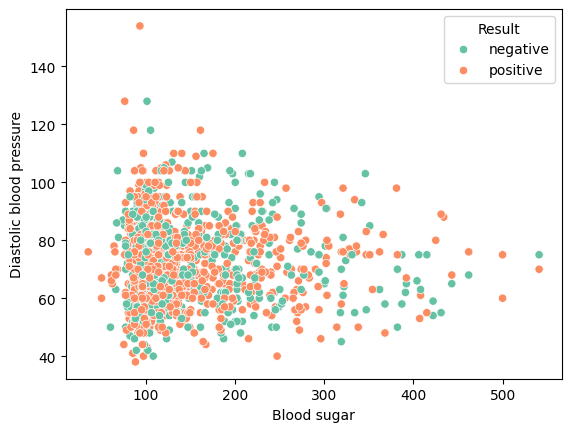

In [17]:
# Сахар и диастолическое давления
dv.Pairplt(df, "Blood sugar", "Diastolic blood pressure")

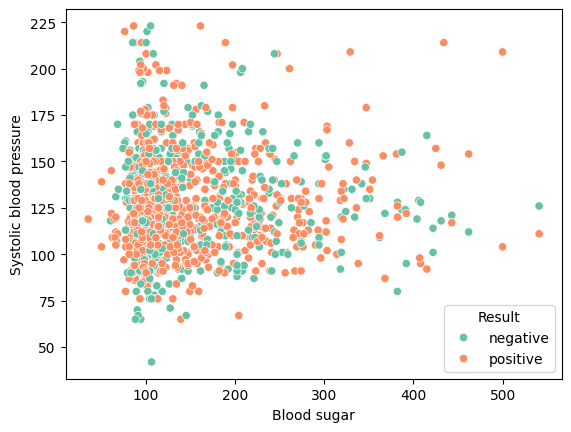

In [18]:
# Сахар и сисстолическое давления
dv.Pairplt(df, "Blood sugar", "Systolic blood pressure")